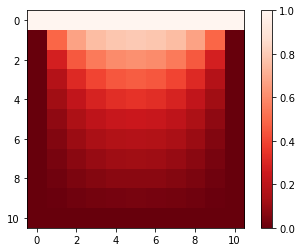

Wall time: 386 ms


In [32]:
%%time
#Exercício 1
from numpy import empty,zeros,max
from pylab import imshow,show,colorbar,set_cmap
# Constants
M = 10
V = 1.0
target = 1e-6
# Grid squares on a side
# Voltage at top wall
# Target accuracy
#Create arrays to hold potential values 6
phi= zeros([M+1,M+1] ,float)
phi[0,:] = V
phiprime = empty([M+1,M+1] ,float)
a=1
# Main loop
delta = 1.0
while delta>target:
    
# Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+a,j] + phi[i-a,j] + phi[i,j+a] + phi[i,j-a])/4 
# Calculate maximum difference from old values
    delta = max(abs(phi-phiprime))
# Swap the two arrays around
    phi,phiprime = phiprime,phi
# Make a plot
imshow(phi)
colorbar()
set_cmap("Reds_r")
show() 

#está a demorar imenso, lol. Mudei para 20

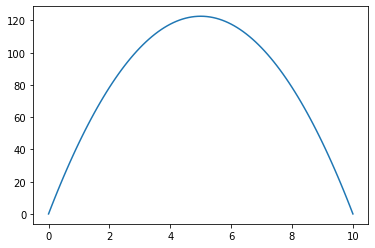

In [17]:
#Exercício 2
from numpy import empty,zeros,max,linspace
from pylab import plot,show
M = 100
a=0.0
b=10.0
h=(b-a)/M
target = 1e-5
x= zeros([M+1] ,float)
g=9.81
# Main loop
delta = 1.0
while delta>target:
    xp = empty([M+1] ,float)
    for i in range(1,M):
        xp[0] = xp[M] = 0.0
        xp[i] = 0.5*(x[i+1] + x[i-1] + h*h*g)
# Calculate maximum difference from old values
    delta = max(abs(x-xp))
# Swap the two arrays around
    x=xp
# Make a plot
plot(linspace(a,b,M+1),x)
show() 



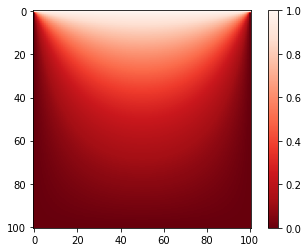

Wall time: 24 s


In [2]:
%%time
#Exercício 3
from numpy import empty,zeros
from pylab import imshow,show,colorbar,set_cmap
M = 100
V = 1.0
target = 1e-6
phi= zeros([M+1,M+1] ,float)
phi[0,:] = V
phiprime = empty([M+1,M+1] ,float)
delta = 1.0
omega=0.9
while delta>target:
    delta=0.0
    for i in range(M+1):
        for j in range(M+1):
            if not i==0 and not i==M and not j==0 and not j==M:
                oldphi=phi[i,j]
                phi[i,j] = (1+omega)*(phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4 - omega*oldphi
                epsilon = (abs(phi[i,j]-oldphi))
                if epsilon>delta:
                    delta = epsilon
imshow(phi)
colorbar()
set_cmap("Reds_r")
show() 

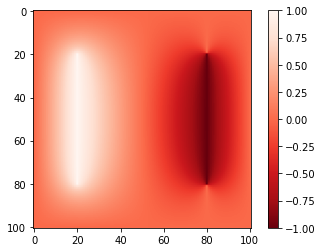

In [4]:
#Exercício 4
from numpy import zeros
from pylab import imshow,show,colorbar,set_cmap

# Constants
V = 1.0  # volts
a = 0.1  # grid spacing in centimeters
N = 100  # number of grid points
delta = 10 ** -6  # volts
omega = 0.9

def larger(a, b):
    if a >= b:
        return a
    else:
        return b


# Solve poisson's equation using Gauss-Seidel relaxation method
max_diff = 2 * delta
# initialize array
phi = zeros([N + 1, N + 1], float)
phi[20:81, 20] = V
phi[20:81, 80] = -V
while max_diff > delta:
    #  reset max difference after each complete update of grid
    max_diff = 0.0
    for i in range(N + 1):
        for j in range(N + 1):
            if not i == 0 and not j == 0 and not i == N and not j == N and not (20 <= i <= 80 and j == 20 or j == 80):
                old_phi = phi[i,j]
                new_phi = (1 + omega) * (phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1]) / 4 \
                          - omega * old_phi
                phi[i, j] = new_phi

                # note the largest change in phi in this update of the grid
                max_diff = larger(max_diff, abs(new_phi - old_phi))
    # print("max_diff = ", max_diff)


imshow(phi)
colorbar()
set_cmap("Reds_r")
show()